In [89]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import arcpy

cm = 1/2.54  # centimeters in inches

%matplotlib inline

In [90]:
from trf import surface, shader, utils

phi = 1.618
x=1900
y=1500
swatchHeight = 400
swatchWidth = int(swatchHeight * phi) #GoldenRatio

In [91]:
dem = arcpy.RasterToNumPyArray("./Crater_Lake.tif")
nlcd = arcpy.RasterToNumPyArray("./NLCD.tif")

dem = dem[y-swatchHeight:y+swatchHeight, x-swatchWidth:x+swatchWidth]
nlcd = nlcd[y-swatchHeight:y+swatchHeight, x-swatchWidth:x+swatchWidth]


In [92]:
snv = surface.normals_by_method(dem, 3.33, "N82")
bm = np.asarray(Image.open(r"./DiamondPlate_500.tiff"))
#bm = np.asarray(Image.open(r"../BumpMaps/Waves_NS.tiff"))
bumpmap = surface.bump_extent_by_mask(nlcd==11, bm)

In [93]:
B = surface.applyBumpMap(snv, bumpmap)

In [13]:
for az in [270, 0, 90]:
    hs = shader.lambert(B, utils.lightVector(az, 30))
    print(az)
    hs_clamped = hs
    hs_clamped[hs<0] = 0
    hs_clamped *= 255
    #fig, axs = plt.subplots(1,1, figsize=(8*cm, 8*cm))
    #fig.set_dpi(600)
    #axs.yaxis.set_visible(False)
    #axs.xaxis.set_visible(False)
    #axs.imshow(hs_clamped.astype('uint8'), cmap='gray')
    x=Image.fromarray(hs_clamped.astype('uint8'))
    x.save("Waves_{}.jpg".format(az))

270
0
90


In [78]:
x=1600
y=2625
swatchHeight = 400
swatchWidth = 400

dem = arcpy.RasterToNumPyArray("./Crater_Lake.tif")
nlcd = arcpy.RasterToNumPyArray("./NLCD.tif")
bm = np.asarray(Image.open(r"./DiamondPlate_500.tiff"))

dem = dem[y-swatchHeight:y+swatchHeight, x-swatchWidth:x+swatchWidth]
nlcd = nlcd[y-swatchHeight:y+swatchHeight, x-swatchWidth:x+swatchWidth]

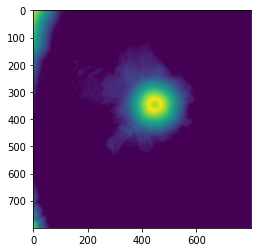

In [79]:
plt.imshow(dem)

In [80]:
snv = surface.normals_by_method(dem, 3.33, "N82")
bumpmap = surface.bump_extent_by_mask(nlcd != 11, bm)

In [85]:
WizIsland = surface.applyBumpMap(snv, bumpmap)
hs = shader.lambert(WizIsland, utils.lightVector(315, 45))
hs_clamped = hs
hs_clamped[hs<0] = 0

In [88]:
x=Image.fromarray(hs_clamped.astype('uint8'))
x.save("WizardIsland.png")
